# Build Neural Network

In this notebook, I will import the preprocessed data from the notebook "Data Preprocessing" and build a neural network using Keras to predict the type of seed.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
# Import preprocessed data
X_train = pd.read_csv('X_train.csv')
y_train = pd.read_csv('y_train.csv')
X_valid = pd.read_csv('X_valid.csv')
y_valid = pd.read_csv('y_valid.csv')

In [3]:
# Define Keras model with layers
# Use rectified linear unit (relu) activation function until final layer, where softmax is used, 
# since there are multiple classes in the target
# Input shape is number of features
# Use L2 regularization to help prevent overfitting
model = keras.Sequential([
    layers.Dense(units=7, activation='relu', input_shape = [7], kernel_regularizer=keras.regularizers.l2(l=0.01)),
    layers.Dense(units=3, activation='relu', kernel_regularizer=keras.regularizers.l2(l=0.01)),
    layers.Dense(3, activation='softmax')]) 

# Set adam optimizer and categorical crossentropy loss function (since there are multiple classes in the target)
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'])

# Define early stopping
early_stopping = EarlyStopping(
    min_delta=0.001, 
    patience=3, 
    restore_best_weights=True)

# Fit the model, defining batch size (the number of rows of train data to use at a time) and epochs (the number
# of times to use entire train data
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=10,
    epochs=100,
    callbacks=[early_stopping])

Epoch 1/100
15/15 [==============================] - 4s 82ms/step - loss: 1.2595 - accuracy: 0.1156 - val_loss: 1.2416 - val_accuracy: 0.2222
Epoch 2/100
15/15 [==============================] - 0s 12ms/step - loss: 1.2439 - accuracy: 0.1156 - val_loss: 1.2306 - val_accuracy: 0.1905
Epoch 3/100
15/15 [==============================] - 0s 13ms/step - loss: 1.2311 - accuracy: 0.0952 - val_loss: 1.2218 - val_accuracy: 0.1111
Epoch 4/100
15/15 [==============================] - 0s 11ms/step - loss: 1.2205 - accuracy: 0.1088 - val_loss: 1.2139 - val_accuracy: 0.1905
Epoch 5/100
15/15 [==============================] - 0s 11ms/step - loss: 1.2122 - accuracy: 0.0952 - val_loss: 1.2070 - val_accuracy: 0.1746
Epoch 6/100
15/15 [==============================] - 0s 12ms/step - loss: 1.2050 - accuracy: 0.1905 - val_loss: 1.2012 - val_accuracy: 0.1587
Epoch 7/100
15/15 [==============================] - 0s 18ms/step - loss: 1.1984 - accuracy: 0.2177 - val_loss: 1.1960 - val_accuracy: 0.1905
Epoch 

15/15 [==============================] - 0s 11ms/step - loss: 0.5845 - accuracy: 0.8844 - val_loss: 0.5954 - val_accuracy: 0.8889
Epoch 59/100
15/15 [==============================] - 0s 11ms/step - loss: 0.5736 - accuracy: 0.8912 - val_loss: 0.5926 - val_accuracy: 0.8730
Epoch 60/100
15/15 [==============================] - 0s 9ms/step - loss: 0.5648 - accuracy: 0.8980 - val_loss: 0.5814 - val_accuracy: 0.8889
Epoch 61/100
15/15 [==============================] - 0s 10ms/step - loss: 0.5560 - accuracy: 0.8980 - val_loss: 0.5754 - val_accuracy: 0.8730
Epoch 62/100
15/15 [==============================] - 0s 10ms/step - loss: 0.5484 - accuracy: 0.8912 - val_loss: 0.5637 - val_accuracy: 0.8889
Epoch 63/100
15/15 [==============================] - 0s 10ms/step - loss: 0.5404 - accuracy: 0.9116 - val_loss: 0.5587 - val_accuracy: 0.8889
Epoch 64/100
15/15 [==============================] - 0s 16ms/step - loss: 0.5328 - accuracy: 0.9048 - val_loss: 0.5519 - val_accuracy: 0.8889
Epoch 65/100


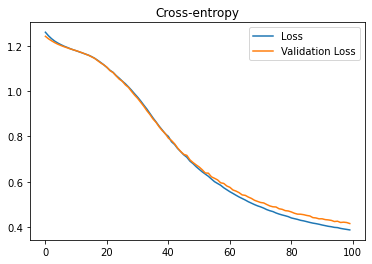

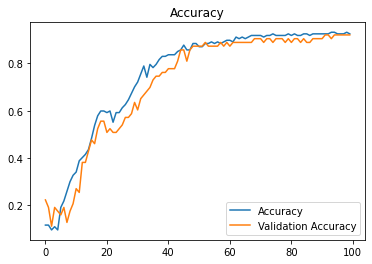

In [4]:
# Convert the training history to a dataframe
df_history = pd.DataFrame(history.history)

# Update column names
df_history.rename(columns={'loss':'Loss', 'accuracy':'Accuracy', 'val_loss':'Validation Loss',  
                   'val_accuracy':'Validation Accuracy'}, inplace=True)
df_history.loc[:, ['Loss', 'Validation Loss']].plot(title="Cross-entropy")
df_history.loc[:, ['Accuracy', 'Validation Accuracy']].plot(title="Accuracy");

In [5]:
# Make predictions using the model
y_pred = np.argmax(model.predict(X_valid), axis=-1)

In [6]:
# Convert the validation target data to be compatible with the prediction data
y_valid_cm = y_valid.idxmax(axis=1).replace({'Variety of Wheat_1': 0, 'Variety of Wheat_2': 1, 'Variety of Wheat_3': 2}).to_numpy()

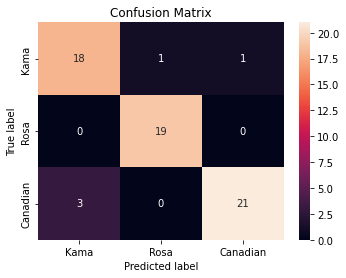

In [7]:
# Confusion matrix
cm = confusion_matrix(y_valid_cm, y_pred)
df_cm = pd.DataFrame(cm, 
                     index = ['Kama','Rosa','Canadian'], 
                     columns = ['Kama','Rosa','Canadian'])

plt.figure(figsize=(5.5,4))
sns.heatmap(df_cm, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label');


In [8]:
# Print the classification report
target_names=['Kama','Rosa','Canadian']
print(classification_report(y_valid_cm, y_pred, target_names=target_names))

              precision    recall  f1-score   support

        Kama       0.86      0.90      0.88        20
        Rosa       0.95      1.00      0.97        19
    Canadian       0.95      0.88      0.91        24

    accuracy                           0.92        63
   macro avg       0.92      0.92      0.92        63
weighted avg       0.92      0.92      0.92        63



The overall accuracy is 92%. Precision measures, for a given class, the percentage of predictions that were correct for that class. Recall measures what percentage of a given class in the validation set was correctly predicted. 

The Kama class has higher recall than precision, while the Rosa and Canadian classes have a higher precision than recall. The Rosa class has a recall of 1.00, meaning all instances of the Rosa class in the validation set were correctly predicted to belong to that class.